In [1]:
import logging
import os
import pickle
import time
import statistics
from abc import abstractmethod

import colorsys
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import hdbscan

from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import statistics



<font size = 5>Load Data, Create airspeedchange feature and Drop other rows</font>

In [2]:
f0 = 'base.csv'
f1 = 'random1.csv'
f2 = 'wind1.csv'
f3 = 'engine1.csv'
f4 = 'sensor1.csv'
f5 = 'crash.csv'

base_df = pd.read_csv(f0, header=0, index_col=None)
random1_df = pd.read_csv(f1, header=0, index_col=None)
wind1_df = pd.read_csv(f2, header=0, index_col=None)
engine1_df = pd.read_csv(f3, header=0, index_col=None)
sensor1_df = pd.read_csv(f4, header=0, index_col=None)
crash1_df = pd.read_csv(f5, header=0, index_col=None)

df_list = [base_df, random1_df, wind1_df, engine1_df, sensor1_df,crash1_df]

for df in df_list:

    df['airspeedchange'] = df['airspeed']- df['airspeed'].shift(1)
    df['airspeedchange'].fillna(0, inplace=True)

base_df = base_df[['roll', 'pitch', 'yaw', 'rollspeed', 'pitchspeed', 'yawspeed',  'airspeedchange']]
random1_df = random1_df[['roll', 'pitch', 'yaw', 'rollspeed', 'pitchspeed', 'yawspeed', 'airspeedchange']]
wind1_df = wind1_df[['roll', 'pitch', 'yaw', 'rollspeed', 'pitchspeed', 'yawspeed', 'airspeedchange']]
engine1_df = engine1_df[['roll', 'pitch', 'yaw', 'rollspeed', 'pitchspeed', 'yawspeed', 'airspeedchange']]
sensor1_df = sensor1_df[['roll', 'pitch', 'yaw', 'rollspeed', 'pitchspeed', 'yawspeed', 'airspeedchange']]
crash1_df = crash1_df[['roll', 'pitch', 'yaw', 'rollspeed', 'pitchspeed', 'yawspeed', 'airspeedchange']]



<font size = 5> Count Anomalies </font>

In [3]:
random1_nonanomalies = len(random1_df)
wind1_anomalies = len(wind1_df)
engine1_anomalies = len(engine1_df)
sensor1_anomalies = len(sensor1_df)
crash1_anomalies = len(crash1_df)


<font size = 5> Train LOF Model with Base Data</font>

In [4]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# create a LOF model
lof = LocalOutlierFactor(n_neighbors=14, contamination="auto",novelty=True)

# fit the model to the dataset and predict the outlier scores
lof.fit(base_df)

# print the outlier scores for each data point
lof.negative_outlier_factor_
# identify the indices of the inliers (score > threshold)
#inlier_indices = np.where(scores > lof.offset_)[0]

# identify the indices of the outliers (score < threshold)
#outlier_indices = np.where(scores < lof.offset_)[0]

# print the indices of the inliers and outliers
#print("Inlier indices:", inlier_indices)
#print("Outlier indices:", outlier_indices)

array([ -4.6809082 ,  -4.59705792,  -4.5654484 ,  -4.50938167,
        -4.47631446,  -4.46594162,  -4.53797726,  -4.52604883,
        -4.11025363,  -6.41994029, -31.72002324,  -2.85096977,
        -2.83664111, -10.27682089,  -4.48691629,  -3.46497444,
        -2.01202715,  -1.19302867,  -1.12662254,  -1.23032142,
        -1.11619601,  -1.11252141,  -1.16795146,  -1.23305287,
        -1.33629519,  -1.42174259,  -1.18932821,  -1.18473853,
        -1.0890534 ,  -1.07030139,  -1.09999526,  -1.1518322 ,
        -1.18495777,  -1.15077818,  -1.21199318,  -1.20843129,
        -1.21040228,  -1.22087053,  -1.21310128,  -1.22520892,
        -1.21313082,  -1.20446791,  -1.1875693 ,  -1.18240388,
        -1.16907498,  -1.16010252,  -1.14861693,  -1.13874365,
        -1.13158764,  -1.128161  ,  -1.14084516,  -1.1076101 ,
        -1.13734019,  -1.1444529 ,  -1.15027422,  -1.12596257,
        -1.25494194,  -1.16264249,  -1.22624893,  -1.25561702,
        -1.348514  ,  -1.22341756,  -1.24444366,  -1.18

/var/folders/f3/zd51vztd1hz1f_fhbtyppk0w0000gn/T/ipykernel_86008/2252728083.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=100 * (1 - outlyingness / min(outlyingness)), edgecolors='k', cmap='coolwarm')


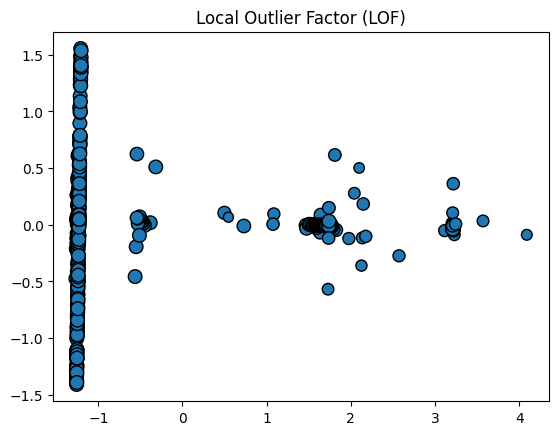

In [5]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(base_df)

outlyingness = lof.negative_outlier_factor_


plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=100 * (1 - outlyingness / min(outlyingness)), edgecolors='k', cmap='coolwarm')
plt.title('Local Outlier Factor (LOF)')
plt.show()



<font size = 5> Predicting using Random (RQ1) </font>

/Users/ivantan97/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/ivantan97/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/var/folders/f3/zd51vztd1hz1f_fhbtyppk0w0000gn/T/ipykernel_86008/1700331.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=100 * (1 - outlyingness / min(outlyingness)), edgecolors='k', cmap='coolwarm')
/var/folders/f3/zd51vztd1hz1f_fhbtyppk0w0000gn/T/ipykernel_86008/1700331.py:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(test_red

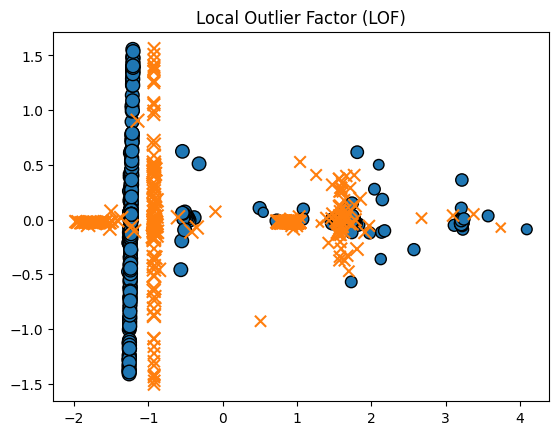

In [6]:

outlyingness = lof.negative_outlier_factor_

lof.predict(random1_df)


outlyingness_new = lof.decision_function(random1_df)

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(base_df)
test_reduced_data = PCA(n_components=pca_num_components).fit_transform(random1_df)



plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=100 * (1 - outlyingness / min(outlyingness)), edgecolors='k', cmap='coolwarm')
plt.scatter(test_reduced_data[:, 0], test_reduced_data[:, 1], s=100 * (1 - outlyingness_new / min(outlyingness_new)), marker = 'x', edgecolors='k', cmap='coolwarm')
plt.title('Local Outlier Factor (LOF)')
plt.show()


In [7]:
min(outlyingness)
min(outlyingness_new)

-24.21281498449134

In [8]:
labels = lof.predict(random1_df)

pd.Series(labels).value_counts()

/Users/ivantan97/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


-1    252
 1    102
dtype: int64

In [9]:
count = 0
for label in labels:
    if label == 1:
        count += 1

print(count)
percentage = count/len(random1_df)*100

print("The percentage of non-anomalies is", percentage)


102
The percentage of non-anomalies is 28.8135593220339


/Users/ivantan97/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/ivantan97/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/var/folders/f3/zd51vztd1hz1f_fhbtyppk0w0000gn/T/ipykernel_86008/1280960124.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=100 * (1 - outlyingness / min(outlyingness)), edgecolors='k', cmap='coolwarm')
/var/folders/f3/zd51vztd1hz1f_fhbtyppk0w0000gn/T/ipykernel_86008/1280960124.py:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(te

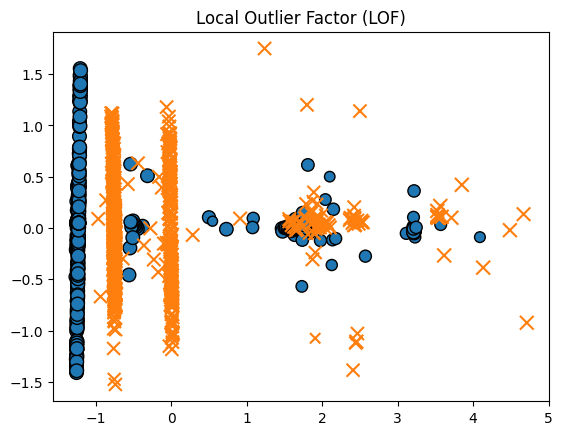

In [10]:
outlyingness = lof.negative_outlier_factor_

lof.predict(random1_df)


outlyingness_new = lof.decision_function(wind1_df)

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(base_df)
test_reduced_data = PCA(n_components=pca_num_components).fit_transform(wind1_df)



plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=100 * (1 - outlyingness / min(outlyingness)), edgecolors='k', cmap='coolwarm')
plt.scatter(test_reduced_data[:, 0], test_reduced_data[:, 1], s=100 * (1 - outlyingness_new / min(outlyingness_new)), marker = 'x', edgecolors='k', cmap='coolwarm')
plt.title('Local Outlier Factor (LOF)')
plt.show()

In [11]:
labels = lof.predict(wind1_df)

pd.Series(labels).value_counts()





/Users/ivantan97/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


-1    654
 1     20
dtype: int64

In [12]:
count = 0

for label in labels:
    if label == -1:
        count += 1

percentage = count/wind1_anomalies*100

print("The number of outliers detected for wind is ",count, "which is", percentage)

The number of outliers detected for wind is  654 which is 97.03264094955489


/Users/ivantan97/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/ivantan97/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/var/folders/f3/zd51vztd1hz1f_fhbtyppk0w0000gn/T/ipykernel_86008/3346470961.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=100 * (1 - outlyingness / min(outlyingness)), edgecolors='k', cmap='coolwarm')
/var/folders/f3/zd51vztd1hz1f_fhbtyppk0w0000gn/T/ipykernel_86008/3346470961.py:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(te

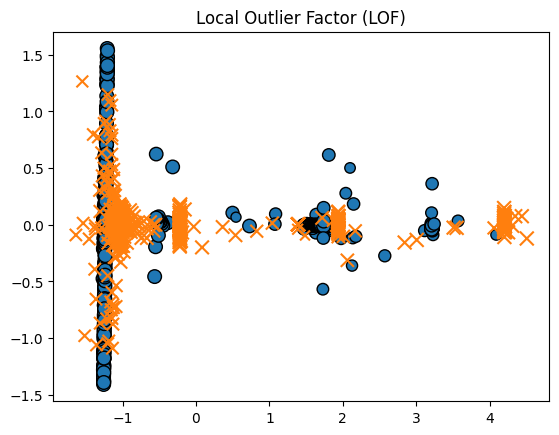

In [13]:
outlyingness = lof.negative_outlier_factor_

lof.predict(random1_df)


outlyingness_new = lof.decision_function(engine1_df)

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(base_df)
test_reduced_data = PCA(n_components=pca_num_components).fit_transform(engine1_df)



plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=100 * (1 - outlyingness / min(outlyingness)), edgecolors='k', cmap='coolwarm')
plt.scatter(test_reduced_data[:, 0], test_reduced_data[:, 1], s=100 * (1 - outlyingness_new / min(outlyingness_new)), marker = 'x', edgecolors='k', cmap='coolwarm')
plt.title('Local Outlier Factor (LOF)')
plt.show()

In [14]:
labels = lof.predict(engine1_df)

pd.Series(labels).value_counts()

/Users/ivantan97/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


-1    468
 1      2
dtype: int64

In [15]:
labels = lof.predict(engine1_df)

pd.Series(labels).value_counts()

count = 0

for label in labels:
    if label == -1:
        count += 1

percentage = count/engine1_anomalies*100

print("The number of outliers detected for wind is ",count, "which is", percentage)



The number of outliers detected for wind is  468 which is 99.57446808510639


/Users/ivantan97/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


/Users/ivantan97/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/ivantan97/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/var/folders/f3/zd51vztd1hz1f_fhbtyppk0w0000gn/T/ipykernel_86008/578239327.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=100 * (1 - outlyingness / min(outlyingness)), edgecolors='k', cmap='coolwarm')
/var/folders/f3/zd51vztd1hz1f_fhbtyppk0w0000gn/T/ipykernel_86008/578239327.py:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(test

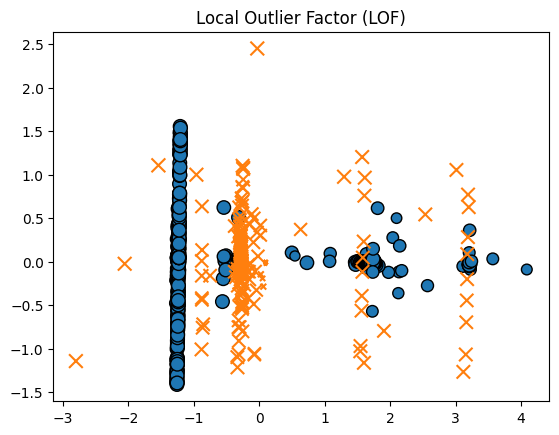

In [16]:
outlyingness = lof.negative_outlier_factor_

lof.predict(random1_df)


outlyingness_new = lof.decision_function(sensor1_df)

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(base_df)
test_reduced_data = PCA(n_components=pca_num_components).fit_transform(sensor1_df)



plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=100 * (1 - outlyingness / min(outlyingness)), edgecolors='k', cmap='coolwarm')
plt.scatter(test_reduced_data[:, 0], test_reduced_data[:, 1], s=100 * (1 - outlyingness_new / min(outlyingness_new)), marker = 'x', edgecolors='k', cmap='coolwarm')
plt.title('Local Outlier Factor (LOF)')
plt.show()

In [17]:
labels = lof.predict(sensor1_df)

pd.Series(labels).value_counts()

/Users/ivantan97/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


-1    212
dtype: int64

In [18]:
count = 0

for label in labels:
    if label == -1:
        count += 1

percentage = count/sensor1_anomalies*100

print("The number of outliers detected for wind is ",count, "which is", percentage)

The number of outliers detected for wind is  212 which is 100.0


In [19]:
labels = lof.predict(crash1_df)

pd.Series(labels).value_counts()

/Users/ivantan97/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


-1    73
 1     1
dtype: int64

In [20]:
count = 0

for label in labels:
    if label == -1:
        count += 1

percentage = count/crash1_anomalies*100

print("The number of outliers detected for wind is ",count, "which is", percentage)

The number of outliers detected for wind is  73 which is 98.64864864864865
